## Importing Necessary Modules
Importing the necessary modules for the project. For this project, Keras, Image, Numpy, Matplotlib. We also need to import ImageDataGenerator for generating the data for which we have to extract the features. 

In [0]:
import keras
from PIL import Image
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Using TensorFlow backend.


## Importing The Google Drive
Importing Google Drive so that necessary datasets and inforamtion can be imported and exported 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp ./drive/My\ Drive/DataSets/fruits-360.zip ./fruits-360.zip

In [0]:
!unzip 'fruits-360.zip'

Archive:  fruits-360.zip
   creating: fruits-360/
  inflating: fruits-360/LICENSE      
  inflating: fruits-360/readme.md    
   creating: fruits-360/Training/
   creating: fruits-360/Training/Apple Braeburn/
  inflating: fruits-360/Training/Apple Braeburn/0_100.jpg  
  inflating: fruits-360/Training/Apple Braeburn/100_100.jpg  
  inflating: fruits-360/Training/Apple Braeburn/101_100.jpg  
  inflating: fruits-360/Training/Apple Braeburn/102_100.jpg  
  inflating: fruits-360/Training/Apple Braeburn/103_100.jpg  
  inflating: fruits-360/Training/Apple Braeburn/104_100.jpg  
  inflating: fruits-360/Training/Apple Braeburn/105_100.jpg  
  inflating: fruits-360/Training/Apple Braeburn/106_100.jpg  
  inflating: fruits-360/Training/Apple Braeburn/107_100.jpg  
  inflating: fruits-360/Training/Apple Braeburn/108_100.jpg  
  inflating: fruits-360/Training/Apple Braeburn/109_100.jpg  
  inflating: fruits-360/Training/Apple Braeburn/10_100.jpg  
  inflating: fruits-360/Training/Apple Braeburn/11

## Importing The Pretrained Model
Importing the pretrained VGG16(Visual Geometry Group) model. The model is trained with 'Imagenet' Dataset. 

In [0]:
model = VGG16(weights='imagenet', include_top=False) #top is not included as we are
                                                     #dealing with only feature extraction
model.summary()

W0813 14:24:03.010853 139796983261056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 14:24:03.053102 139796983261056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 14:24:03.063170 139796983261056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 14:24:03.104641 139796983261056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 3s 0us/step


W0813 14:24:06.844929 139796983261056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0813 14:24:06.846142 139796983261056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [0]:
def image_loader(img_path):
  img = image.load_img(img_path, target_size=(224, 224))
  #print(img.shape) gives error as the object is 'Image', not array
  plt.imshow(img)
  img_data = image.img_to_array(img)
  print(img_data.shape)
  img_data = np.expand_dims(img_data, axis=0)
  print(img_data.shape)
  img_data = preprocess_input(img_data)
  print(img_data.shape)
  return img_data

(224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


(1, 7, 7, 512)

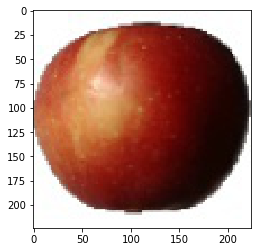

In [0]:
img_path = '/content/fruits-360/Test/Apple Braeburn/321_100.jpg'
img_data = image_loader(img_path)
model_feature = model.predict(img_data)
model_feature.shape

## 

In [0]:
import os


root_dir_train = '/content/fruits-360/Training'

'''for subdir, dirs, files in os.walk(root_dir_train):
    for file in files:
      path = os.path.join(subdir, file)
      print("Processing: {}".format(path))
      img_data = image_loader(path)
      
      feature = model.predict(img_data)
      feature_np = np.array(feature)
      features.append(feature_np.flatten())'''


datagen = ImageDataGenerator(rescale=1./255)
generator = datagen.flow_from_directory(
        root_dir_train,
        target_size=(224, 224),
        batch_size=32,
        class_mode='sparse',
        shuffle=True)

#for x, y in generator:
 # print(y)

Found 27342 images belonging to 57 classes.


In [0]:
count = 0
features = []
labels = []
for x, y in generator:
  count += 1
  for img in x:
      
      print("Processing: {}".format(count))
      img_data = np.expand_dims(img, axis=0)
      img_data = preprocess_input(img_data)
      feature = model.predict(img_data)
      feature_np = np.array(feature)
      features.append(feature_np.flatten())
  labels.append(y)
  if count == 700:
    break;


features_array = np.array(features)
np.save('features_train.npy', features_array)

Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 1
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 2
Processing: 3
Processing: 3
Processing: 3
Processing: 3
Processing: 3
Processing: 3
Processing: 3
Proces

In [0]:
labels = np.array(labels)
print(features_array.shape)
print(labels.shape)
!cp /content/features_train.npy ./drive/My\ Drive/DataSets/features_train.npy

(22400, 25088)
(700, 32)


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_array)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)

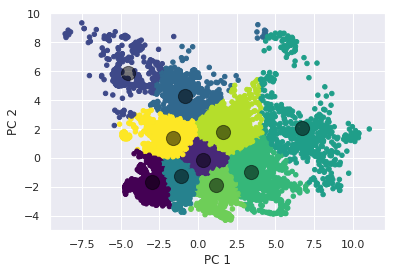

In [0]:
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], \
            c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.savefig('Result.png')
!cp /content/Result.png ./drive/My\ Drive/DataSets/Result.png
plt.show()

In [0]:
labels = np.reshape(labels, (1, -1))

In [0]:
y_kmeans = np.reshape(y_kmeans, (1, -1))

In [0]:
print(y_kmeans)
print(labels)

[[1 8 6 ... 4 1 4]]
[[55. 21. 33. ... 20. 27.  1.]]


In [0]:
np.save('cluster_labels.npy', y_kmeans)
np.save('labels.npy', labels)
!cp /content/labels.npy ./drive/My\ Drive/DataSets/labels.npy
!cp /content/cluster_labels.npy ./drive/My\ Drive/DataSets/cluster_labels.npy

In [0]:
y_kmeans_new = np.load('/content/drive/My Drive/DataSets/cluster_labels.npy')
labels_new = np.load('/content/drive/My Drive/DataSets/labels.npy')
labels_new = np.squeeze(labels_new, axis = 0)
y_kmeans_new = np.squeeze(y_kmeans_new, axis = 0)
print(y_kmeans_new.shape)
print(labels_new.shape)
print(y_kmeans_new[0: 12]) 
print(labels_new[0: 43])     

(22400,)
(22400,)
[1 8 6 1 1 4 4 4 8 1 7 7]
[55. 21. 33.  9.  9.  4. 33. 28. 44. 44. 51. 10. 43. 42. 36. 38. 56. 42.
  3. 52. 25.  8. 15. 39. 22. 55. 50. 49. 38. 21. 12.  7. 23.  2. 36. 29.
  3. 18. 21.  1. 12.  5. 51.]


In [0]:
def duplicates(lst, item):
   return [i for i, x in enumerate(lst) if x == item]

In [0]:
classes_string = ['Apple Braeburn', 'Avocado ripe', 'Banana Lady Finger', 'Blueberry', 'Cactus fruit', 'Cantaloupe 2', 'Carambula', 'Cherry Wax Red', 'Chestnut', 'Cocos', 'Dates', 'Ginger Root', 'Grape Pink', 'Grape White', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Lemon', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mangostan', 'Melon Piel de Sapo', 'Mulberry','Nut Forest', 'Nut Pecan', 'Onion Red Peeled', 'Papaya', 'Passion fruit', 'Peach Flat', 'Pear', 'Pear Kaiser', 'Pepino', 'Pepper Green', 'Physalis with Husk', 'Pineapple', 'Pineapple Mini', 'Pitahaya Red', 'Plum 3', 'Pomegranate', 'Pomelo Sweetie', 'Potato Red Washed', 'Potato White', 'Rambutan', 'Raspberry', 'Salak', 'Strawberry', 'Tamarillo', 'Tomato 3', 'Tomato Yellow', 'Walnut']

In [0]:
cluster_indices = []
for i in range(0, 10):
    x = np.array(duplicates(y_kmeans_new, i))
    cluster_indices.append(x)
cluster_indices = np.array(cluster_indices)
print(cluster_indices, cluster_indices.shape)
np.save('cluster_indices.npy', cluster_indices)
!cp /content/cluster_indices.npy ./drive/My\ Drive/DataSets/cluster_indices.npy

[array([   28,    33,    42, ..., 22381, 22388, 22393])
 array([    0,     3,     4, ..., 22391, 22396, 22398])
 array([   31,    65,   134,   164,   196,   259,   282,   317,   361,
         439,   479,   599,   629,   806,   819,   913,   954,   962,
        1060,  1070,  1073,  1080,  1117,  1144,  1236,  1280,  1297,
        1306,  1388,  1650,  1684,  1690,  1702,  1750,  1761,  1768,
        1801,  1821,  1863,  2080,  2182,  2198,  2206,  2257,  2278,
        2281,  2295,  2357,  2367,  2479,  2519,  2574,  2591,  2615,
        2658,  2822,  2854,  2876,  2883,  2885,  2886,  2888,  2897,
        2904,  2994,  3439,  3444,  3497,  3596,  3759,  3818,  4044,
        4111,  4146,  4210,  4260,  4331,  4375,  4377,  4518,  4519,
        4534,  4600,  4631,  4918,  4947,  4963,  5010,  5054,  5068,
        5096,  5159,  5318,  5319,  5358,  5397,  5403,  5455,  5675,
        5688,  5733,  5880,  5906,  6256,  6357,  6392,  6396,  6411,
        6428,  6432,  6473,  6503,  6597,  6634

In [0]:
def image_view_clusters(rows = 7, columns = 7, cluster = 1):
    indices = cluster_indices[cluster ]
    classes = [labels_new[i] for i in indices]
    classes = [int(i) for i in classes]
    from collections import Counter
    cnt = Counter(classes)
    cnt = cnt.most_common(3)
    classes = [k for k, v in cnt]
    print(classes)
    classes_cat = [classes_string[i - 1] for i in classes]
    '''generator = datagen.flow_from_directory(
        '/content/fruits-360/Training',
        classes = classes_cat,
        target_size = (224, 224),
        batch_size=32,
        class_mode = 'categorical')
    count = 0
    for x, y in generator:
        for img in x:
            print(img)
            break
            for img in x:
            img = Image.fromarray(img, 'RGB')
            plt.imshow(img)
            count += 1
            if count == n_images:
                break'''
    fig=plt.figure(figsize=(rows, columns))
    count_pic = 0
    for i in classes_cat:
        root_dir_train ='/content/fruits-360/Training' + '/' + i 
        count = 0
        for subdir, dirs, files in os.walk(root_dir_train):
            for file in files:
                count += 1
                count_pic += 1
                path = os.path.join(root_dir_train, file)
                print("Processing: {}".format(path))
                img = image.load_img(path, target_size=(224, 224))#.convert('L')
                fig.add_subplot(rows, columns, count_pic)    
                plt.imshow(img)#, cmap = 'gray')
                if count == columns:
                    break

    pic_name = 'Cluster' + str(cluster) + '.png'
    plt.savefig(pic_name)
    plt.show()            

[53, 15, 1]
Processing: /content/fruits-360/Training/Tamarillo/262_100.jpg
Processing: /content/fruits-360/Training/Tamarillo/120_100.jpg
Processing: /content/fruits-360/Training/Tamarillo/263_100.jpg
Processing: /content/fruits-360/Training/Tamarillo/r_144_100.jpg
Processing: /content/fruits-360/Training/Tamarillo/131_100.jpg
Processing: /content/fruits-360/Training/Tamarillo/r_247_100.jpg
Processing: /content/fruits-360/Training/Tamarillo/r_177_100.jpg
Processing: /content/fruits-360/Training/Grapefruit White/r_208_100.jpg
Processing: /content/fruits-360/Training/Grapefruit White/262_100.jpg
Processing: /content/fruits-360/Training/Grapefruit White/120_100.jpg
Processing: /content/fruits-360/Training/Grapefruit White/263_100.jpg
Processing: /content/fruits-360/Training/Grapefruit White/r_144_100.jpg
Processing: /content/fruits-360/Training/Grapefruit White/131_100.jpg
Processing: /content/fruits-360/Training/Grapefruit White/r_247_100.jpg
Processing: /content/fruits-360/Training/Appl

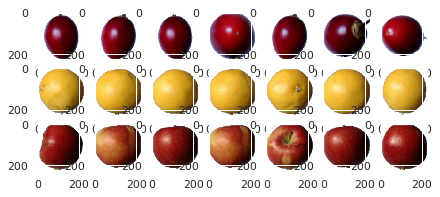

In [0]:
image_view_clusters()

[7, 30, 18]
Processing: /content/fruits-360/Training/Carambula/38_100.jpg
Processing: /content/fruits-360/Training/Carambula/262_100.jpg
Processing: /content/fruits-360/Training/Carambula/120_100.jpg
Processing: /content/fruits-360/Training/Carambula/263_100.jpg
Processing: /content/fruits-360/Training/Carambula/r_144_100.jpg
Processing: /content/fruits-360/Training/Carambula/131_100.jpg
Processing: /content/fruits-360/Training/Carambula/75_100.jpg
Processing: /content/fruits-360/Training/Nut Forest/r2_107_100.jpg
Processing: /content/fruits-360/Training/Nut Forest/120_100.jpg
Processing: /content/fruits-360/Training/Nut Forest/131_100.jpg
Processing: /content/fruits-360/Training/Nut Forest/427_100.jpg
Processing: /content/fruits-360/Training/Nut Forest/r_63_100.jpg
Processing: /content/fruits-360/Training/Nut Forest/209_100.jpg
Processing: /content/fruits-360/Training/Nut Forest/r2_97_100.jpg
Processing: /content/fruits-360/Training/Huckleberry/38_100.jpg
Processing: /content/fruits-3

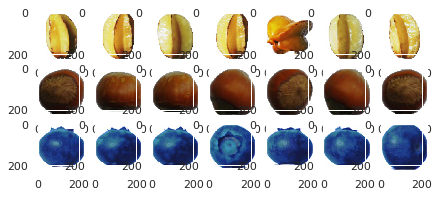

In [0]:
image_view_clusters(cluster = 2)

[42, 43, 21]
Processing: /content/fruits-360/Training/Pineapple Mini/38_100.jpg
Processing: /content/fruits-360/Training/Pineapple Mini/262_100.jpg
Processing: /content/fruits-360/Training/Pineapple Mini/120_100.jpg
Processing: /content/fruits-360/Training/Pineapple Mini/263_100.jpg
Processing: /content/fruits-360/Training/Pineapple Mini/r_144_100.jpg
Processing: /content/fruits-360/Training/Pineapple Mini/r_247_100.jpg
Processing: /content/fruits-360/Training/Pineapple Mini/r_177_100.jpg
Processing: /content/fruits-360/Training/Pitahaya Red/38_100.jpg
Processing: /content/fruits-360/Training/Pitahaya Red/r_208_100.jpg
Processing: /content/fruits-360/Training/Pitahaya Red/120_100.jpg
Processing: /content/fruits-360/Training/Pitahaya Red/131_100.jpg
Processing: /content/fruits-360/Training/Pitahaya Red/75_100.jpg
Processing: /content/fruits-360/Training/Pitahaya Red/r_247_100.jpg
Processing: /content/fruits-360/Training/Pitahaya Red/73_100.jpg
Processing: /content/fruits-360/Training/Ko

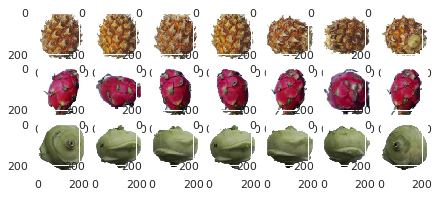

In [0]:
image_view_clusters(cluster = 6)

[28, 20, 5]
Processing: /content/fruits-360/Training/Melon Piel de Sapo/r2_69_100.jpg
Processing: /content/fruits-360/Training/Melon Piel de Sapo/38_100.jpg
Processing: /content/fruits-360/Training/Melon Piel de Sapo/r2_30_100.jpg
Processing: /content/fruits-360/Training/Melon Piel de Sapo/r_208_100.jpg
Processing: /content/fruits-360/Training/Melon Piel de Sapo/r2_216_100.jpg
Processing: /content/fruits-360/Training/Melon Piel de Sapo/120_100.jpg
Processing: /content/fruits-360/Training/Melon Piel de Sapo/r2_190_100.jpg
Processing: /content/fruits-360/Training/Kiwi/r_208_100.jpg
Processing: /content/fruits-360/Training/Kiwi/262_100.jpg
Processing: /content/fruits-360/Training/Kiwi/120_100.jpg
Processing: /content/fruits-360/Training/Kiwi/263_100.jpg
Processing: /content/fruits-360/Training/Kiwi/r_144_100.jpg
Processing: /content/fruits-360/Training/Kiwi/131_100.jpg
Processing: /content/fruits-360/Training/Kiwi/r_247_100.jpg
Processing: /content/fruits-360/Training/Cactus fruit/38_100.

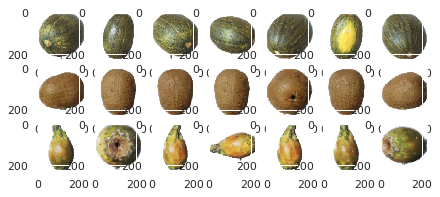

In [0]:
image_view_clusters(cluster = 4)

[49, 37, 39]
Processing: /content/fruits-360/Training/Rambutan/38_100.jpg
Processing: /content/fruits-360/Training/Rambutan/r_208_100.jpg
Processing: /content/fruits-360/Training/Rambutan/262_100.jpg
Processing: /content/fruits-360/Training/Rambutan/120_100.jpg
Processing: /content/fruits-360/Training/Rambutan/263_100.jpg
Processing: /content/fruits-360/Training/Rambutan/r_144_100.jpg
Processing: /content/fruits-360/Training/Rambutan/75_100.jpg
Processing: /content/fruits-360/Training/Pear Kaiser/38_100.jpg
Processing: /content/fruits-360/Training/Pear Kaiser/120_100.jpg
Processing: /content/fruits-360/Training/Pear Kaiser/r_144_100.jpg
Processing: /content/fruits-360/Training/Pear Kaiser/75_100.jpg
Processing: /content/fruits-360/Training/Pear Kaiser/r_177_100.jpg
Processing: /content/fruits-360/Training/Pear Kaiser/73_100.jpg
Processing: /content/fruits-360/Training/Pear Kaiser/r_173_100.jpg
Processing: /content/fruits-360/Training/Pepper Green/38_100.jpg
Processing: /content/fruits-

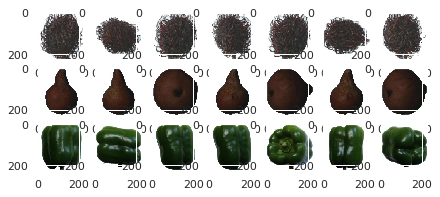

In [0]:
image_view_clusters(cluster = 5)

[51, 29, 10]
Processing: /content/fruits-360/Training/Salak/38_100.jpg
Processing: /content/fruits-360/Training/Salak/r_208_100.jpg
Processing: /content/fruits-360/Training/Salak/262_100.jpg
Processing: /content/fruits-360/Training/Salak/120_100.jpg
Processing: /content/fruits-360/Training/Salak/263_100.jpg
Processing: /content/fruits-360/Training/Salak/r_144_100.jpg
Processing: /content/fruits-360/Training/Salak/75_100.jpg
Processing: /content/fruits-360/Training/Mulberry/38_100.jpg
Processing: /content/fruits-360/Training/Mulberry/262_100.jpg
Processing: /content/fruits-360/Training/Mulberry/120_100.jpg
Processing: /content/fruits-360/Training/Mulberry/263_100.jpg
Processing: /content/fruits-360/Training/Mulberry/r_144_100.jpg
Processing: /content/fruits-360/Training/Mulberry/131_100.jpg
Processing: /content/fruits-360/Training/Mulberry/75_100.jpg
Processing: /content/fruits-360/Training/Cocos/38_100.jpg
Processing: /content/fruits-360/Training/Cocos/r_208_100.jpg
Processing: /conten

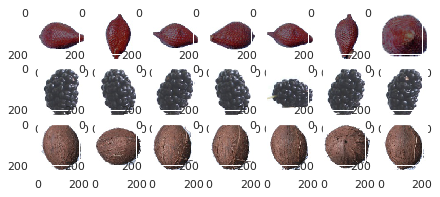

In [0]:
image_view_clusters(cluster = 7)

[44, 0, 45]
Processing: /content/fruits-360/Training/Plum 3/r3_64_100.jpg
Processing: /content/fruits-360/Training/Plum 3/r2_69_100.jpg
Processing: /content/fruits-360/Training/Plum 3/38_100.jpg
Processing: /content/fruits-360/Training/Plum 3/r2_30_100.jpg
Processing: /content/fruits-360/Training/Plum 3/262_100.jpg
Processing: /content/fruits-360/Training/Plum 3/r2_216_100.jpg
Processing: /content/fruits-360/Training/Plum 3/r3_275_100.jpg
Processing: /content/fruits-360/Training/Walnut/r2_69_100.jpg
Processing: /content/fruits-360/Training/Walnut/r2_30_100.jpg
Processing: /content/fruits-360/Training/Walnut/r_208_100.jpg
Processing: /content/fruits-360/Training/Walnut/262_100.jpg
Processing: /content/fruits-360/Training/Walnut/r2_216_100.jpg
Processing: /content/fruits-360/Training/Walnut/120_100.jpg
Processing: /content/fruits-360/Training/Walnut/r2_190_100.jpg
Processing: /content/fruits-360/Training/Pomegranate/r_208_100.jpg
Processing: /content/fruits-360/Training/Pomegranate/262_1

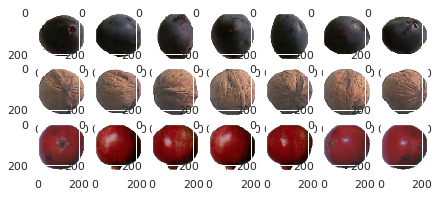

In [0]:
image_view_clusters(cluster = 8)

[34, 46, 16]
Processing: /content/fruits-360/Training/Pomelo Sweetie/r2_69_100.jpg
Processing: /content/fruits-360/Training/Pomelo Sweetie/r2_107_100.jpg
Processing: /content/fruits-360/Training/Pomelo Sweetie/38_100.jpg
Processing: /content/fruits-360/Training/Pomelo Sweetie/r2_30_100.jpg
Processing: /content/fruits-360/Training/Pomelo Sweetie/120_100.jpg
Processing: /content/fruits-360/Training/Pomelo Sweetie/r2_190_100.jpg
Processing: /content/fruits-360/Training/Pomelo Sweetie/r_144_100.jpg
Processing: /content/fruits-360/Training/Guava/r_208_100.jpg
Processing: /content/fruits-360/Training/Guava/262_100.jpg
Processing: /content/fruits-360/Training/Guava/263_100.jpg
Processing: /content/fruits-360/Training/Guava/131_100.jpg
Processing: /content/fruits-360/Training/Guava/r_177_100.jpg
Processing: /content/fruits-360/Training/Guava/275_100.jpg
Processing: /content/fruits-360/Training/Guava/r_173_100.jpg


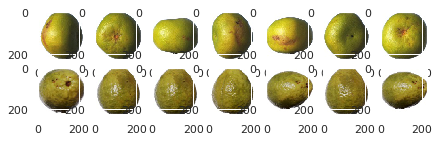

In [0]:
image_view_clusters(cluster = 9)

[56, 54, 44]
Processing: /content/fruits-360/Training/Walnut/r2_69_100.jpg
Processing: /content/fruits-360/Training/Walnut/r2_30_100.jpg
Processing: /content/fruits-360/Training/Walnut/r_208_100.jpg
Processing: /content/fruits-360/Training/Walnut/262_100.jpg
Processing: /content/fruits-360/Training/Walnut/r2_216_100.jpg
Processing: /content/fruits-360/Training/Walnut/120_100.jpg
Processing: /content/fruits-360/Training/Walnut/r2_190_100.jpg
Processing: /content/fruits-360/Training/Tomato 3/r2_69_100.jpg
Processing: /content/fruits-360/Training/Tomato 3/r2_107_100.jpg
Processing: /content/fruits-360/Training/Tomato 3/38_100.jpg
Processing: /content/fruits-360/Training/Tomato 3/262_100.jpg
Processing: /content/fruits-360/Training/Tomato 3/r2_216_100.jpg
Processing: /content/fruits-360/Training/Tomato 3/120_100.jpg
Processing: /content/fruits-360/Training/Tomato 3/r2_190_100.jpg
Processing: /content/fruits-360/Training/Plum 3/r3_64_100.jpg
Processing: /content/fruits-360/Training/Plum 3/r

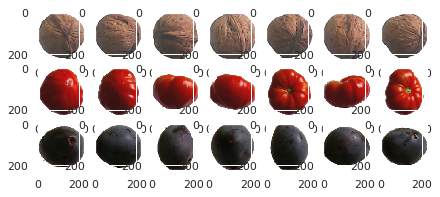

In [0]:
image_view_clusters(cluster = 3)

[14, 38, 40]
Processing: /content/fruits-360/Training/Grape White/r_208_100.jpg
Processing: /content/fruits-360/Training/Grape White/120_100.jpg
Processing: /content/fruits-360/Training/Grape White/r_144_100.jpg
Processing: /content/fruits-360/Training/Grape White/131_100.jpg
Processing: /content/fruits-360/Training/Grape White/r_247_100.jpg
Processing: /content/fruits-360/Training/Grape White/r_177_100.jpg
Processing: /content/fruits-360/Training/Grape White/r_173_100.jpg
Processing: /content/fruits-360/Training/Pepino/262_100.jpg
Processing: /content/fruits-360/Training/Pepino/120_100.jpg
Processing: /content/fruits-360/Training/Pepino/263_100.jpg
Processing: /content/fruits-360/Training/Pepino/r_144_100.jpg
Processing: /content/fruits-360/Training/Pepino/131_100.jpg
Processing: /content/fruits-360/Training/Pepino/r_177_100.jpg
Processing: /content/fruits-360/Training/Pepino/275_100.jpg
Processing: /content/fruits-360/Training/Physalis with Husk/r_208_100.jpg
Processing: /content/fru

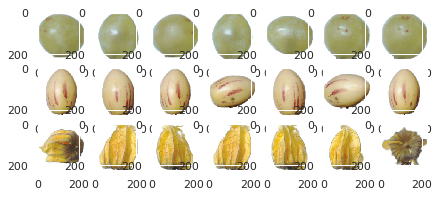

In [0]:
image_view_clusters(cluster = 0)

In [0]:
!cp /content/Cluster0.png ./drive/My\ Drive/DataSets/Cluster0.png
!cp /content/Cluster1.png ./drive/My\ Drive/DataSets/Cluster1.png
!cp /content/Cluster2.png ./drive/My\ Drive/DataSets/Cluster2.png
!cp /content/Cluster3.png ./drive/My\ Drive/DataSets/Cluster3.png
!cp /content/Cluster4.png ./drive/My\ Drive/DataSets/Cluster4.png
!cp /content/Cluster5.png ./drive/My\ Drive/DataSets/Cluster5.png
!cp /content/Cluster6.png ./drive/My\ Drive/DataSets/Cluster6.png
!cp /content/Cluster7.png ./drive/My\ Drive/DataSets/Cluster7.png
!cp /content/Cluster8.png ./drive/My\ Drive/DataSets/Cluster8.png
!cp /content/Cluster9.png ./drive/My\ Drive/DataSets/Cluster9.png